# Using utils_aws

In [1]:
from PIL import Image

from utils_aws import list_files, download_file, aws_txt_read, aws_buffer_read, aws_imread

In [2]:
BUCKET_NAME = "basisai-samples"
DATA_DIR = "shellfish"

txt_filename = "valid/labels/01cfd38d61a7f20a_jpg.rf.32c9cd80d0ce399a14fbfa2d3c38491e.txt"
img_filename = "valid/images/01cfd38d61a7f20a_jpg.rf.32c9cd80d0ce399a14fbfa2d3c38491e.jpg"

txt_path = DATA_DIR + "/date_partition=2020-10-01/" + txt_filename
img_path = DATA_DIR + "/date_partition=2020-10-01/" + img_filename

In [ ]:
# list files in S3
prefix = DATA_DIR + "/date_partition=2020-10-01/valid/labels/"
files = list_files(BUCKET_NAME, prefix)
files[:5]

In [4]:
# read txt file
aws_txt_read(BUCKET_NAME, txt_path)

'0 0.6490384615384616 0.4266826923076923 0.6971153846153846 0.8533653846153846\n0 0.5096153846153846 0.41586538461538464 0.41346153846153844 0.49038461538461536'

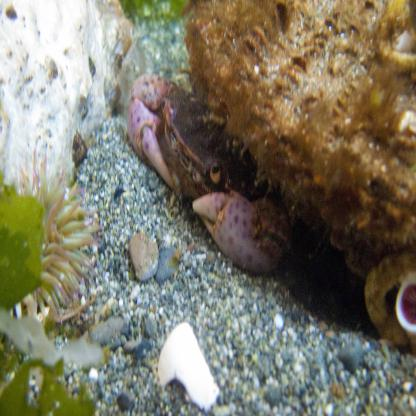

In [5]:
# read image file
npimg = aws_imread(BUCKET_NAME, img_path)
Image.fromarray(npimg[:, :, ::-1])

In [8]:
# load model
import torch

model_path = DATA_DIR + "/weights/yolov5s.pt"

w = aws_buffer_read(BUCKET_NAME, model_path)
DEVICE = torch.device("cpu")
model = torch.load(w, map_location=DEVICE)['model'].float().fuse().eval()

Fusing layers... 


In [9]:
model

Model(
  (model): Sequential(
    (0): Focus(
      (conv): Conv(
        (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): Hardswish()
      )
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): Hardswish()
    )
    (2): BottleneckCSP(
      (cv1): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): Hardswish()
      )
      (cv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (cv3): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (cv4): Conv(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), st